<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 9: Machine Learning Advanced</h3> </center>
<center> <h4> Classification models </h4> </center>
*

###**WORKING ENVIRONMENT SET UP**

In [154]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
# Import onehotencoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
#!pip install pydot
import pydot

# Save model / deployment
import pickle
import sys

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## 1.- Load Data

El dataset consiste en un conjunto de 19 parámetros calculados a partir registros de campañas pasadas asociadas al cliente. Estas variables, recogen distintas características del cliente, desde su edad, estado civil, educación así como información asociada a la cuenta.


**Descripción del dataset**

Este problema de clasificación binaria tiene como objetivo predecir si el cliente suscribirá un depósito bancario a plazo (variable **output**).

Variables de entrada:

#### Bank client data:
- **age** (numeric)

- **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- **marital_status** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- **education_level** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- **is_default**: has credit in default? (categorical: "no","yes","unknown")

- **housing_type**: has housing loan? (categorical: "no","yes","unknown")

- **loan:** has personal loan? (categorical: "no","yes","unknown")

#### Related with the last contact of the current campaign:

- **contact:** contact communication type (categorical: "cellular","telephone")

- **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

- **day_of_week:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")

##### Other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

##### Social and economic context attributes
- **emp_var_rate:** employment variation rate - quarterly indicator (numeric)

- **cons_price_index:** consumer price index - monthly indicator (numeric)

- **cons_conf_index**: consumer confidence index - monthly indicator (numeric)

- **euribor_3m:** euribor 3 month rate - daily indicator (numeric)

- **n_employed**: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
- **output**: - has the client subscribed a term deposit? (binary: "yes","no")

In [107]:
Local = False

In [44]:
'''if Local == True:
    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing
    train_df = pd.read_csv('train.csv').drop('id', axis=1)
else:
    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop('id', axis=1)
'''

'if Local == True:\n    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ\n    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing\n    train_df = pd.read_csv(\'train.csv\').drop(\'id\', axis=1)\nelse:\n    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop(\'id\', axis=1)\n'

In [155]:
train_df = pd.read_csv('train.csv').drop('id', axis=1)

## Data Preprocessing

In [156]:
train_df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [157]:
# Describe the dataset
train_df.describe(include='all')

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
count,33108.000000,33108,33108,33108,33108,33108,33108,33108,33108,33108,33108.000000,33108.000000,33108.000000,33108,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000,33108.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8402,20066,9800,26209,17364,27282,21029,11061,6906,NaN,NaN,NaN,28586,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.038873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.572188,961.659418,0.172859,NaN,0.079851,93.575062,-40.491199,3.619698,5166.970572,0.113628
std,10.403943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.775783,188.907729,0.493891,NaN,1.573452,0.579885,4.628888,1.735692,72.329138,0.317364
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [158]:
# Checking the shape of the dataset
train_df.shape

(33108, 20)

In [159]:
# Showing information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33108 entries, 0 to 33107
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               33108 non-null  int64  
 1   job               33108 non-null  object 
 2   marital_status    33108 non-null  object 
 3   education_level   33108 non-null  object 
 4   is_default        33108 non-null  object 
 5   housing_type      33108 non-null  object 
 6   loan              33108 non-null  object 
 7   contact           33108 non-null  object 
 8   month             33108 non-null  object 
 9   day_of_week       33108 non-null  object 
 10  campaing          33108 non-null  int64  
 11  pdays             33108 non-null  int64  
 12  previous          33108 non-null  int64  
 13  poutcome          33108 non-null  object 
 14  emp_var_rate      33108 non-null  float64
 15  cons_price_index  33108 non-null  float64
 16  cons_conf_index   33108 non-null  float6

- There are 33108 entries and no missing values

In [160]:
# Looking for duplicates
train_df.duplicated().sum()

np.int64(1211)

- There are 1211 duplicates

In [161]:
# Drop duplicates
train_df= train_df.drop_duplicates()

In [162]:
# Checking the shape of the dataset
train_df.shape

(31897, 20)

In [163]:
# Looking at the proportion of the output variable
train_df.output.value_counts(normalize=True)


output
0    0.882873
1    0.117127
Name: proportion, dtype: float64

- Only 11.7% of the data corresponds to clients who subscribed a term deposit.

In [133]:
# Creating numerical and categorical features
numerical_features = train_df.select_dtypes(include='number').columns.tolist()
categorical_features = train_df.select_dtypes(include='object').columns.tolist()

In [73]:
# Checking the numerical features
numerical_features

['age',
 'campaing',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_index',
 'cons_conf_index',
 'euribor_3m',
 'n_employed',
 'output']

In [74]:
# Checking the categorical features
categorical_features

['job',
 'marital_status',
 'education_level',
 'is_default',
 'housing_type',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

### 2.1.- Descriptive Analysis

In [75]:
train_df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,31897.0,40.116406,10.435153,17.000,32.000,38.000,47.000,98.000
campaing,31897.0,2.614791,2.813434,1.000,1.000,2.000,3.000,56.000
pdays,31897.0,960.241747,192.317660,0.000,999.000,999.000,999.000,999.000
previous,31897.0,0.177885,0.500898,0.000,0.000,0.000,0.000,7.000
emp_var_rate,31897.0,0.064561,1.578848,-3.400,-1.800,1.100,1.400,1.400
cons_price_index,31897.0,93.576754,0.584214,92.201,93.075,93.798,93.994,94.767
cons_conf_index,31897.0,-40.488880,4.644024,-50.800,-42.700,-41.800,-36.400,-26.900
euribor_3m,31897.0,3.602448,1.742537,0.634,1.334,4.857,4.961,5.045
n_employed,31897.0,5166.063498,72.758320,4963.600,5099.100,5191.000,5228.100,5228.100
output,31897.0,0.117127,0.321577,0.000,0.000,0.000,0.000,1.000


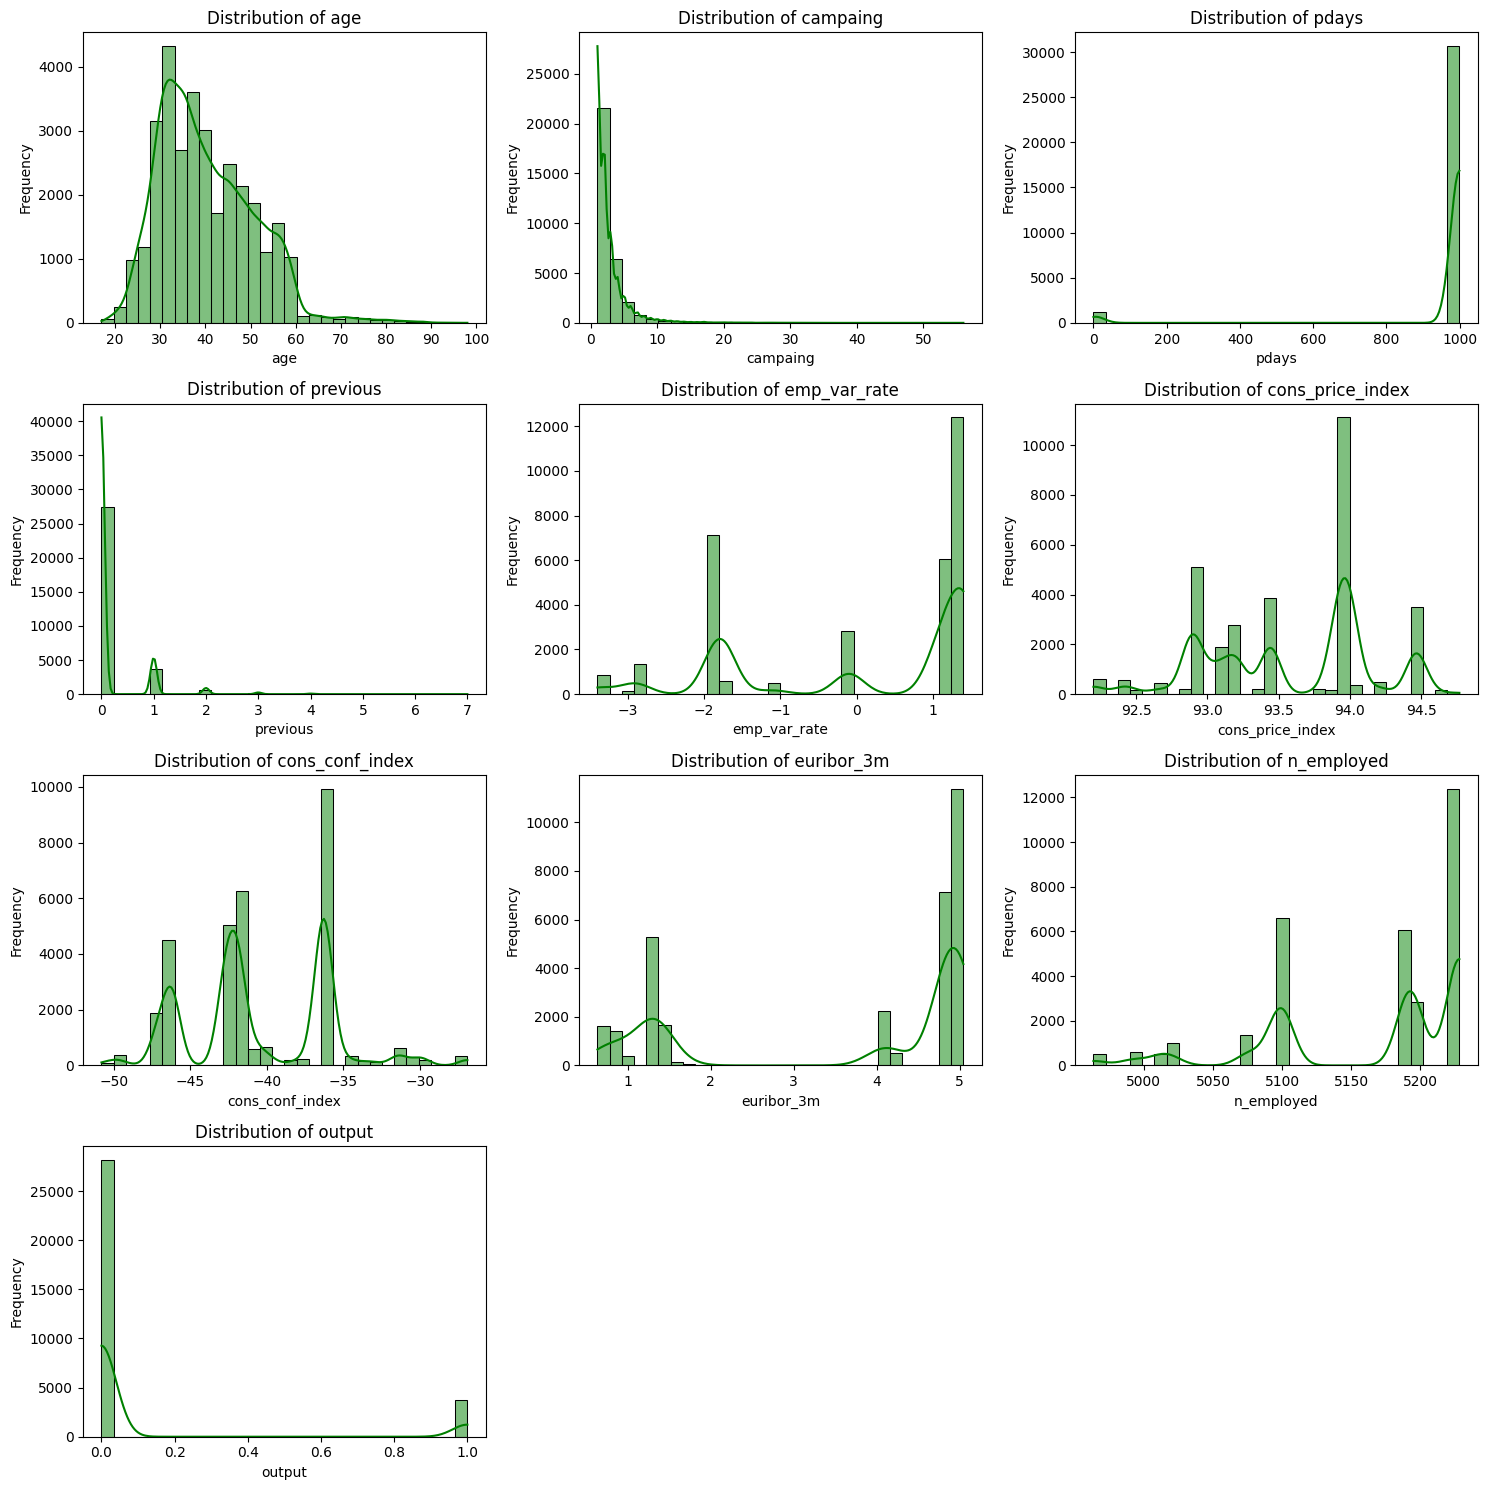

In [17]:
# Histograms of numerical features

# Setting up the grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15)) 
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_features):
    sns.histplot(train_df[col], kde=True, ax=axes[i], bins=30, color="green")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if number of variables < grid cells
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Comments:**

1. **Age (`age`)**:
   - The distribution is slightly right-skewed, with most clients aged between 20 and 60 years. The frequency decreases as age increases, indicating that the campaign primarily targets economically active individuals.

2. **Number of contacts in the current campaign (`campaign`)**:
   - The distribution is highly right-skewed, with most clients being contacted 1-3 times. The long tail indicates that a small number of clients were contacted many times, which could suggest either persistent efforts or difficulty in engaging these clients.

3. **Number of days since last contact in previous campaigns (`pdays`)**:
   - There is a strong peak at 999, representing clients who were never contacted before. Apart from this, a few other values are distributed sparsely, indicating a significant portion of clients are new to the bank's marketing efforts.

4. **Number of contacts in previous campaigns (`previous`)**:
   - The distribution is highly concentrated around 0 and 1, showing that most clients had few or no prior interactions with the bank. This suggests that the bank is reaching out to clients for the first time or that previous engagement was minimal.

5. **Employment variation rate (`emp_var_rate`)**:
   - The distribution has distinct peaks at specific values, reflecting shifts in employment rates during specific quarters. These peaks align with discrete economic conditions affecting the labor market.

6. **Consumer price index (`cons_price_index`)**:
   - The distribution is clustered around specific price levels, indicating relatively stable price index levels over time, punctuated by occasional changes in economic conditions.

7. **Consumer confidence index (`cons_conf_index`)**:
   - This variable is mostly negative, with distinct peaks, reflecting periods of low consumer confidence during the observed time frame. Confidence appears to fluctuate significantly.

8. **3-month Euribor rate (`euribor_3m`)**:
   - The distribution is composed of discrete peaks, likely tied to different monetary policy periods or changes in financial market conditions. This rate directly influences borrowing costs and potentially deposit decisions.

9. **Number of employees (`n_employed`)**:
   - The distribution has peaks at specific values, reflecting stability or stepwise changes in employment levels. These trends may align with quarterly economic shifts.


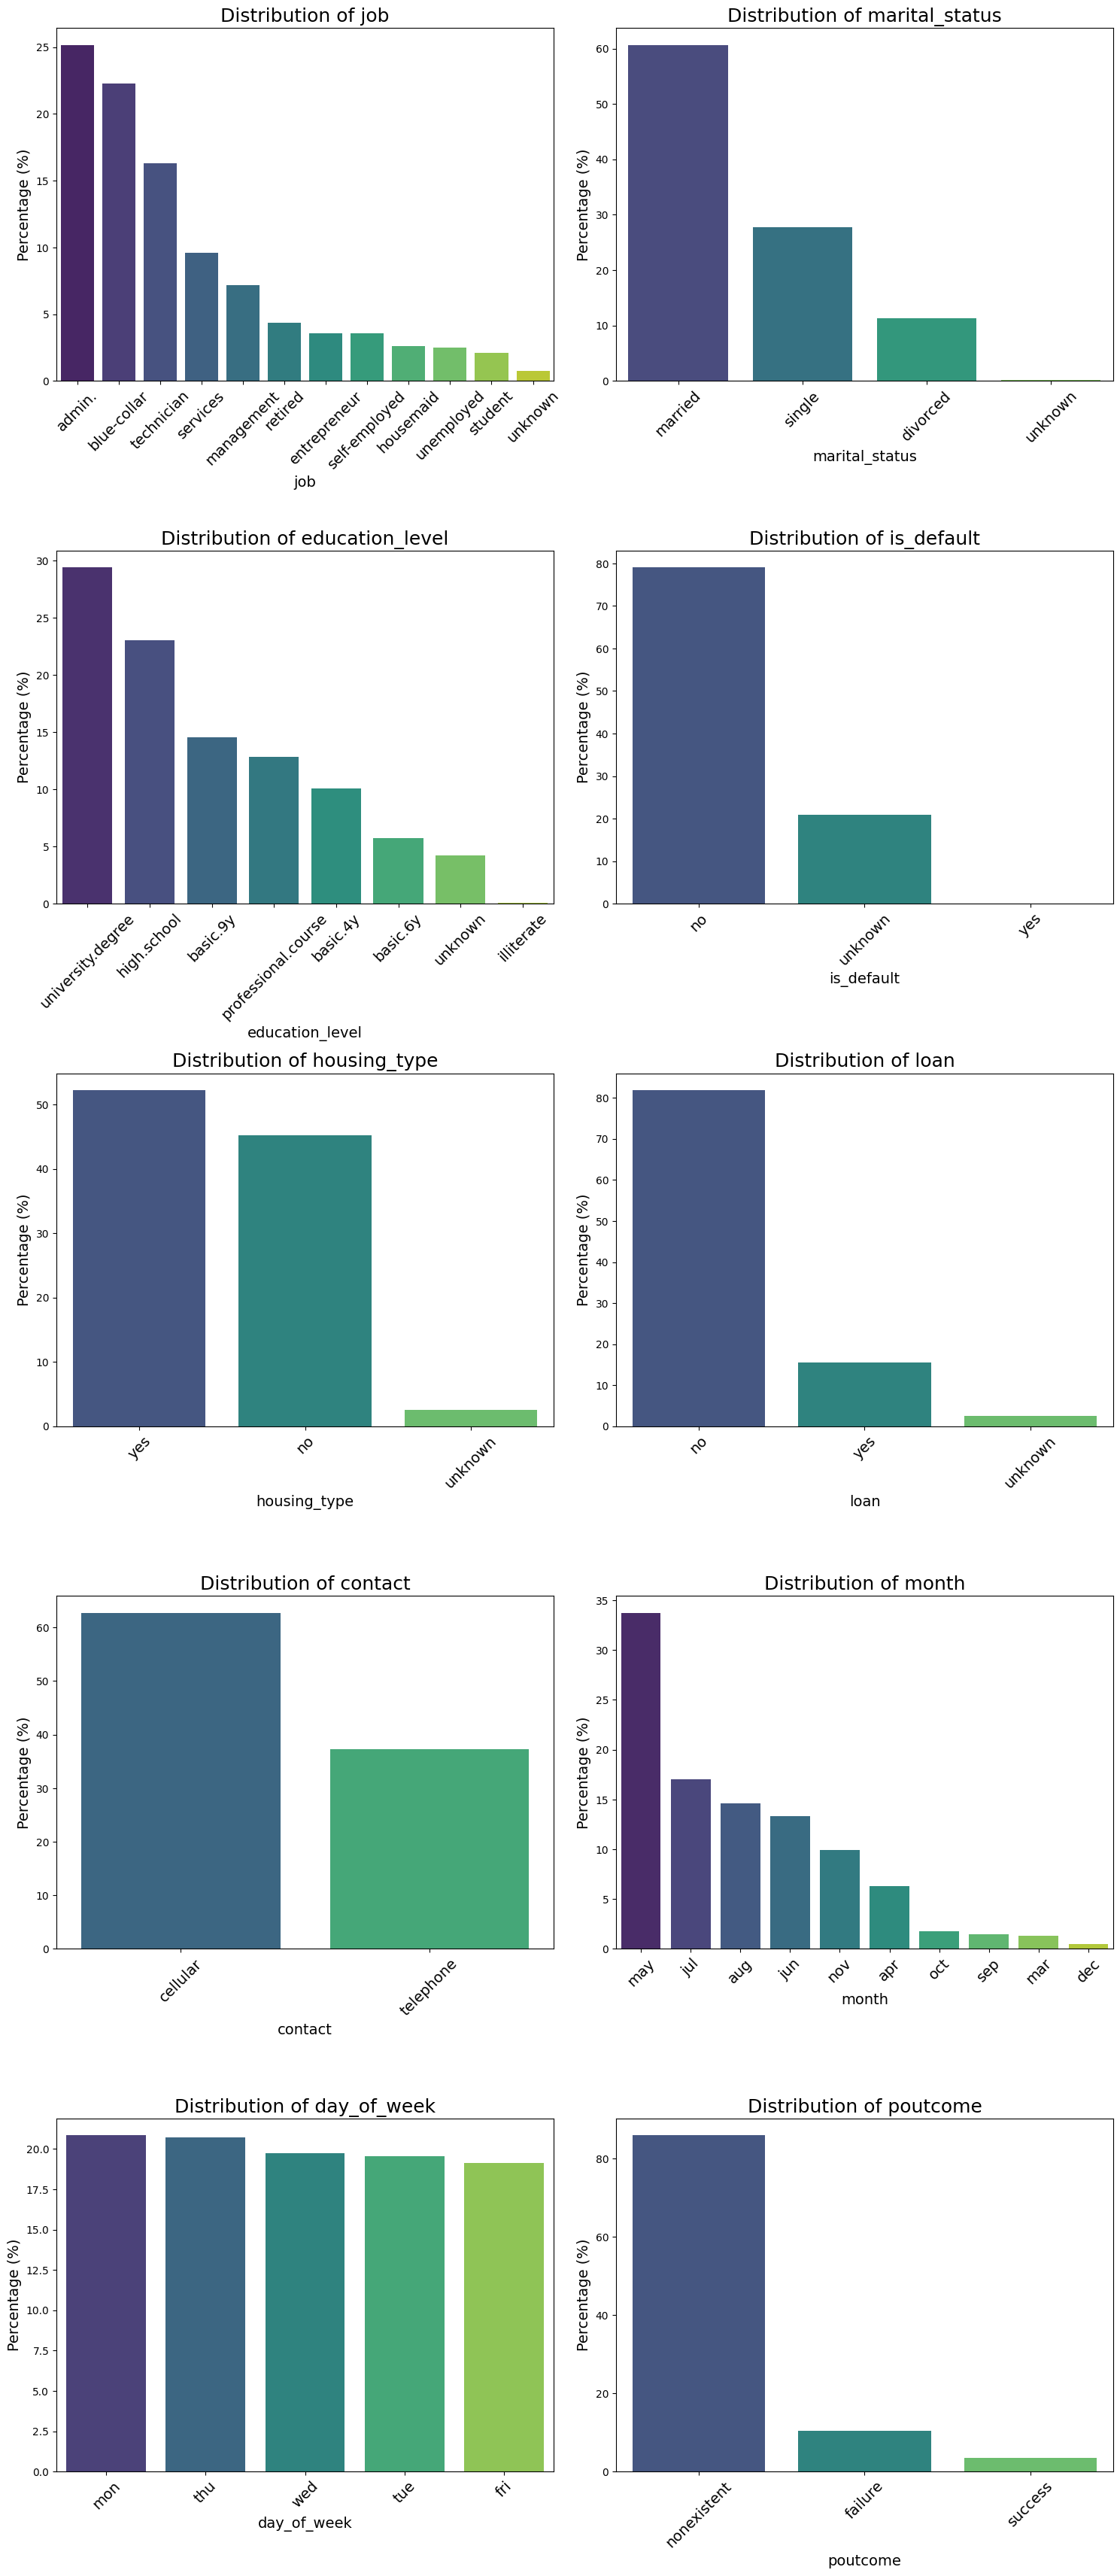

In [59]:
# Percentage Distribution of Customer Attributes

# Create a grid with enough rows and 2 columns
fig, axes = plt.subplots(nrows=(len(categorical_features) // 2 + 1), ncols=2, figsize=(15, 40)) 
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through categorical variables to plot
for i, col in enumerate(categorical_features):
    percentages = train_df[col].value_counts(normalize=True) * 100  # Calculate percentages
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[i], hue = percentages.index, palette="viridis")
    axes[i].set_title(f"Distribution of {col}", fontsize=18)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Percentage (%)" , fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=14 )

# Remove unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Comments:**

**1. Job Distribution**  
- **Most common jobs**: The majority of clients are "admin.", "blue-collar," and "technician," accounting for a significant portion of the dataset.  
- **Rare jobs**: Categories like "student," "unemployed," and "unknown" are less represented.  
- This distribution reflects the campaign's focus on clients likely to have stable income sources, which may correlate with higher deposit subscription probabilities.  

**2. Marital Status Distribution**  
- **Married clients dominate**: About 60% of the dataset represents married individuals.  
- Singles and divorced clients are the next most common groups, with "unknown" being very rare.  
- This suggests that marital status could be a relevant factor, as married clients might have different financial priorities compared to others.  

**3. Education Level Distribution**  
- **Higher education dominates**: "University degree" and "high school" are the most common education levels.  
- **Basic education and others**: "Basic" education levels account for smaller percentages, with "illiterate" and "unknown" being the least represented.  
- Education level may correlate with financial literacy, influencing the likelihood of term deposit subscriptions.  

**4. Default Status Distribution**  
- **Most clients have no default**: Over 80% of the clients do not have credit in default, while very few explicitly have defaults, and some are "unknown."  
- This shows a focus on low-risk clients, as default status may indicate financial instability.  

**5. Housing Loan Distribution**  
- **Even split between "yes" and "no"**: Approximately half of the clients have housing loans.  
- The "unknown" category is minimal, but housing loans could influence financial flexibility for additional investments like deposits.  

**6. Personal Loan Distribution**  
- **Most clients do not have personal loans**: Around 80% of the clients have no personal loans, while a small fraction does.  
- This implies that many clients might have financial capacity to subscribe to deposits.  

**7. Contact Type Distribution**  
- **"Cellular" is dominant**: Most communications were made via mobile phones, with landlines being used less frequently.  
- This suggests a preference for modern communication methods during the campaigns.  

**8. Month of Contact Distribution**  
- **Peak in May**: May is the most frequent month for contact, followed by July, August, and June.  
- Lower frequencies in other months suggest seasonality in campaign efforts, possibly influenced by bank strategies or customer behavior.  

**9. Day of Week Distribution**  
- **Even distribution across weekdays**: Contact efforts seem fairly balanced from Monday to Friday, suggesting no particular preference for specific days.  

**10. Outcome of Previous Campaign**  
- **"Nonexistent" dominates**: Most clients have no history of prior campaign outcomes.  
- Few outcomes are categorized as "failure," and even fewer as "success."  
- This implies that many clients are new to the bank's marketing campaigns, and the success rate of previous efforts is relatively low.  

### Bivariate and multivariate

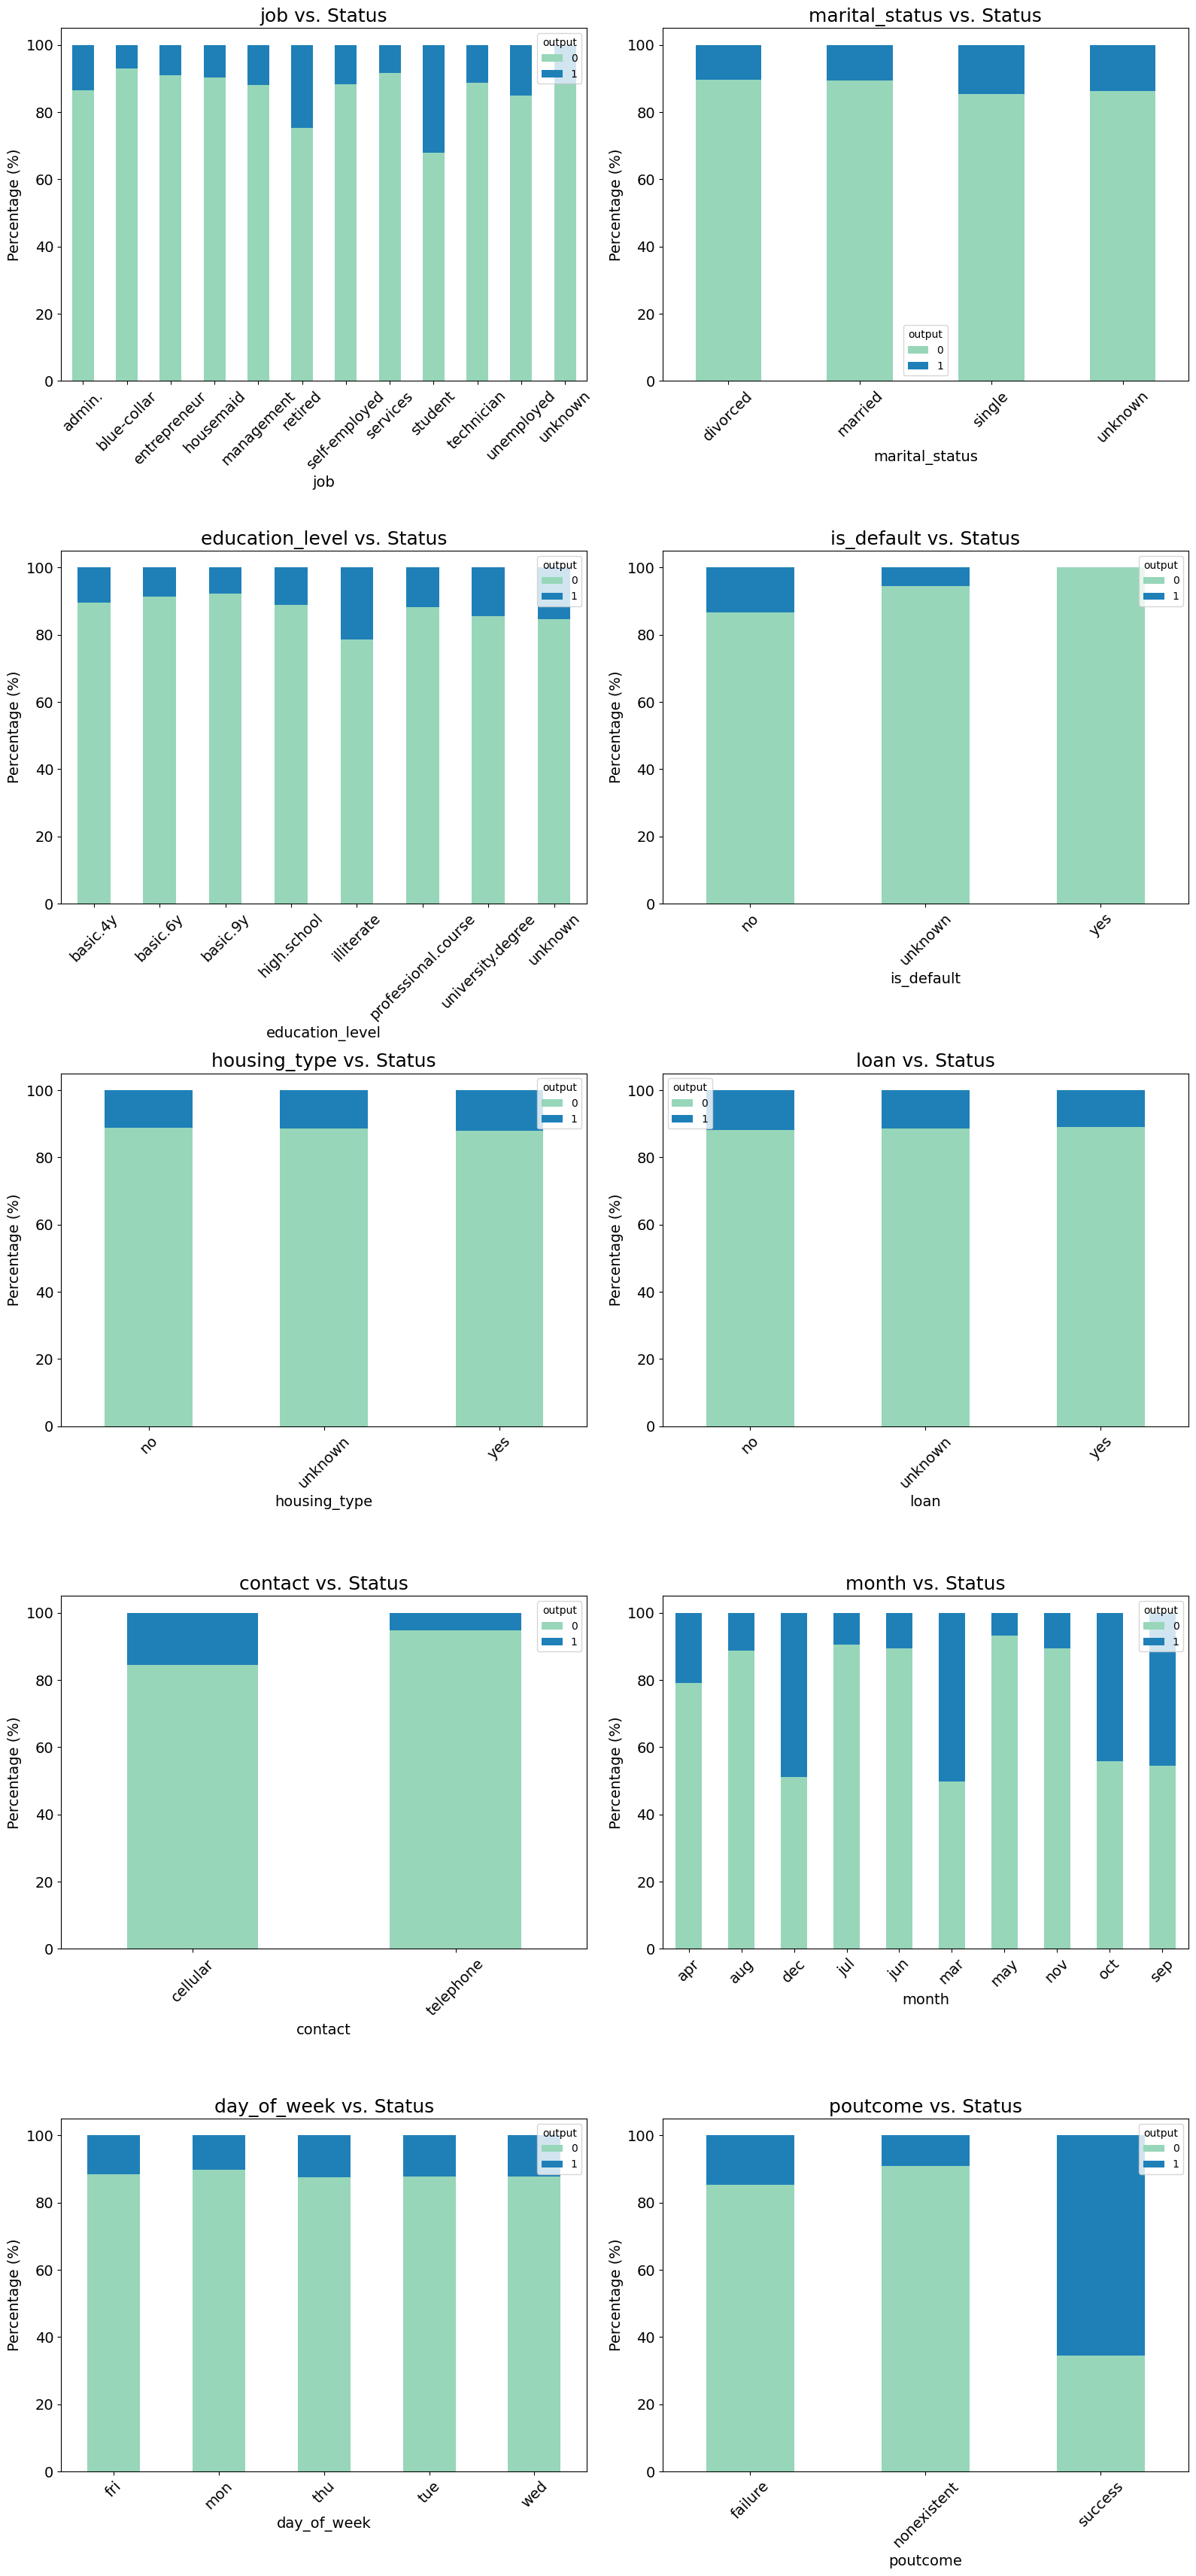

In [60]:
# Percentage Distribution of Output by Customer Attributes

# Create a grid with enough rows and 2 columns for the crosstab analysis
fig, axes = plt.subplots(nrows=(len(categorical_features) // 2 + 1), ncols=2, figsize=(16, 40))
axes = axes.flatten()  # Flatten axes for easy indexing

palette_name = "YlGnBu"  # Select a palette

# Loop through the categorical variables
for i, col in enumerate(categorical_features):
    # Compute the crosstab (percentage within each category)
    crosstab_data = pd.crosstab(train_df[col], train_df['output'], normalize='index') * 100
    
    # Generate colors based on the number of columns in crosstab_data
    colors = sns.color_palette(palette_name, n_colors=len(crosstab_data.columns))
    
    # Plot the stacked bar chart
    crosstab_data.plot(kind='bar', stacked=True, ax=axes[i], color=colors)
    axes[i].set_title(f"{col} vs. Status", fontsize=18)
    axes[i].set_ylabel("Percentage (%)", fontsize=14)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)

# Remove unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Comments:**

- **Job vs. Output**:
  - Higher subscription rates for "students," "retired," and "self-employed."
  - Lower subscription rates for "blue-collar" and "unemployed" individuals.

- **Marital Status vs. Output**:
  - Singles have slightly higher subscription rates compared to married and divorced clients.
  - Married clients dominate in numbers but with lower conversion rates.

- **Education Level vs. Output**:
  - Higher education levels ("university degree," "professional course") correlate with higher subscription rates.
  - Clients with "basic" education show lower subscription rates.

- **Default Status vs. Output**:
  - Clients with no defaults ("no") are more likely to subscribe.
  - Defaults ("yes") and "unknown" categories have significantly lower subscription rates.

- **Housing Loan vs. Output**:
  - Clients without housing loans ("no") have higher subscription rates than those with loans.

- **Personal Loan vs. Output**:
  - Clients without personal loans ("no") are more likely to subscribe compared to those with loans.

- **Contact Type vs. Output**:
  - Cellular contact methods yield higher subscription rates than telephone contacts.

- **Month of Contact vs. Output**:
  - Higher subscription rates in March, December, and September.
  - May has the highest contact volume but relatively low conversion rates.

- **Day of Week vs. Output**:
  - Subscription rates are consistent across all weekdays.

- **Outcome of Previous Campaign vs. Output**:
  - Clients with a successful outcome in a previous campaign ("success") have much higher subscription rates.
  - "Nonexistent" and "failure" outcomes correspond to significantly lower 

#### Correlations

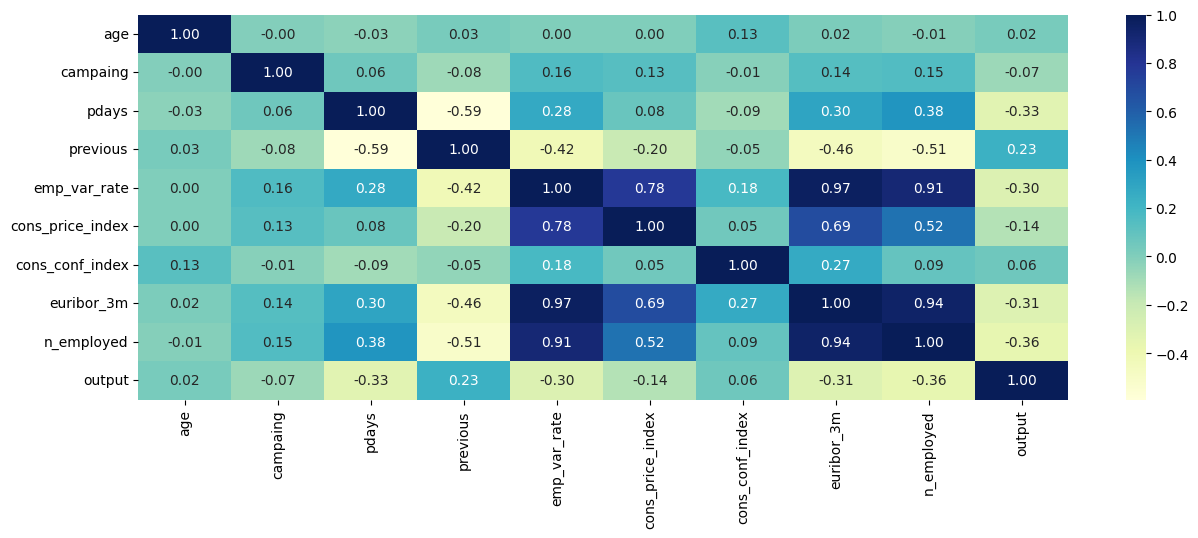

In [61]:
# plotting the correlation between the numerical features
plt.figure(figsize=(15,5))
sns.heatmap(train_df[numerical_features].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')
plt.show()


Correlations:

- **`emp_var_rate` and `euribor_3m` (0.97)**:
   - Very high positive correlation. These two economic indicators are strongly related, likely reflecting financial market and labor market conditions.

- **`emp_var_rate` and `n_employed` (0.91)**:
   - High positive correlation. This indicates that an improvement in the employment variation rate typically coincides with a higher number of employed individuals.

- **`euribor_3m` and `n_employed` (0.94)**:
   - High positive correlation. This shows that higher Euribor rates are associated with higher employment levels.

- Most correlations with the target variable `output` are **low or moderate**:


In [134]:
# Mean of numerical variables grouped by output
train_df.groupby(['output'])[numerical_features].mean().T

output,0,1
age,40.024182,40.811563
campaing,2.689038,2.055139
pdays,983.241185,786.877944
previous,0.135613,0.496520
emp_var_rate,0.237705,-1.240551
cons_price_index,93.606450,93.352919
cons_conf_index,-40.588193,-39.740284
euribor_3m,3.799765,2.115124
n_employed,5175.523366,5094.757468
output,0.000000,1.000000


**Comments**:

- Previous Contacts:

Subscribed clients had a higher number of previous contacts (mean ~0.50) compared to non-subscribed clients (mean ~0.14). This highlights the importance of past interactions in driving success.

- Emp_var_rate (Employment Variation Rate):

Subscribed clients are associated with a lower employment variation rate (mean ~-1.24) compared to non-subscribed clients (mean ~0.24). This could indicate a higher success rate during periods of economic downturn.

- Euribor_3m (Euribor 3-Month Rate):

Subscribed clients are linked to a significantly lower Euribor rate (mean ~2.11) compared to non-subscribed clients (mean ~3.80). This suggests that clients may be more inclined to subscribe during periods of lower interest rates.

#### Feature Engineering
Apply here all the transformations you consider necessary for training a model.

In [63]:
### EJEMPLO

## Crear el encoder
#encoder_contact = OneHotEncoder()

## Fit
#encoder_contact.fit(train_transformed)

# Transform
#train_transformed = encoder_contact.transform(train_transformed)



- Transforming the dataset

In [164]:
# Defining transformation function

def transform_data(data):
    
    # Creating a copy of the data
    data_transf = data.copy()
    
    # NUMERICAL FEATURES
    # Creating a new categorical feature contacted_before based on pdays
    data_transf['contacted_before'] = data_transf['pdays'].apply(lambda x: 0 if x == 999 else 1)
    # Dropping pdays column
    data_transf.drop('pdays', axis=1, inplace=True)
    
    return data_transf         

In [165]:
data_transf = transform_data(train_df)

In [166]:
# Checking the transformed data
data_transf.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output,contacted_before
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


- Spliting the dataset and defining the target variable.

In [167]:
# Defining the target variable
X = data_transf.drop('output', axis=1)
y = data_transf['output']

# Splitting the dataset into training and testing sets, using stratification to ensure equal class distribution since the dataset is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [168]:
# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25517, 19), (6380, 19), (25517,), (6380,))

#### Feature transformation

In [169]:
# Definign the categorical columns for one-hot encoding
one_hot_columns = ['housing_type', 'day_of_week','loan']

#Defining the categorical columns for Target encoding
targ_enc_columns =['marital_status', 'education_level','is_default','contact']

# Definign the categorical columns for WOE encoding
woe_columns = ['month', 'poutcome', 'job']

# Definign the continuous columns for standard scaling
continuous_columns = ['age', 'campaing', 'previous', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'euribor_3m', 'n_employed']


In [170]:
from category_encoders.woe import WOEEncoder

# Function to apply WOE encoding to the specified categorical columns.
def apply_woe(X_train, y_train, X_test, woe_columns):
    """
    Apply WOE encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - woe_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with WOE-transformed columns.
    - X_test_transformed: DataFrame, the testing dataset with WOE-transformed columns.
    - woe_encoder: Fitted WOEEncoder instance.
    """
    # Initialize the WOE encoder
    woe_encoder = WOEEncoder(cols=woe_columns)

    # Fit and transform the training set
    X_train_transformed = woe_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = woe_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, woe_encoder

In [171]:
# Function to apply Target encoding to the specified categorical columns.
from category_encoders.target_encoder import TargetEncoder

def apply_target_encoding(X_train, y_train, X_test, target_columns):
    """
    Apply Target Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - target_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with Target-encoded columns.
    - X_test_transformed: DataFrame, the testing dataset with Target-encoded columns.
    - target_encoder: Fitted TargetEncoder instance.
    """
    # Initialize the Target encoder
    target_encoder = TargetEncoder(cols=target_columns)

    # Fit and transform the training set
    X_train_transformed = target_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = target_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, target_encoder

In [172]:
from sklearn.preprocessing import StandardScaler

# Function to apply Standard Scaling to the specified numerical columns.
def apply_scaling(X_train, X_test, scale_columns):
    """
    Apply Standard Scaling to the specified numerical columns.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - scale_columns: list, list of numerical columns to scale.

    Returns:
    - X_train_scaled: DataFrame, the training dataset with scaled columns.
    - X_test_scaled: DataFrame, the testing dataset with scaled columns.
    - scaler: Fitted StandardScaler instance.
    """
    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Fit the scaler on the training set and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

    # Transform the testing set using the same scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

    return X_train_scaled, X_test_scaled, scaler

In [173]:
from category_encoders.one_hot import OneHotEncoder

def apply_one_hot_encoding(X_train, X_test, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - categorical_columns: list, list of categorical columns to encode.

    Returns:
    - X_train_encoded: DataFrame, the training dataset with One-Hot Encoded columns.
    - X_test_encoded: DataFrame, the testing dataset with One-Hot Encoded columns.
    - encoder: Fitted OneHotEncoder instance from category_encoders.
    """
    # Initialize the OneHotEncoder from category_encoders
    encoder = OneHotEncoder(cols=categorical_columns, use_cat_names=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the testing set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    return X_train_encoded, X_test_encoded, encoder

In [191]:
# Function to transform Train and Test data using the defined encoders

def encoding_data (X_train, y_train, X_test):
    
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()

    
    # Applying WOE encoding
    X_train_enc, X_test_enc, woe_encoder = apply_woe(X_train_enc, y_train, X_test_enc, woe_columns)
    
    # Applying Target encoding
    X_train_enc, X_test_enc, target_encoder = apply_target_encoding(X_train_enc, y_train, X_test_enc, targ_enc_columns)
    
    # Applying Standard Scaling
    X_train_enc, X_test_enc, scaler = apply_scaling(X_train_enc, X_test_enc, continuous_columns)
    
    # Applying One-hot encoding
    X_train_enc, X_test_enc, one_hot_encoder = apply_one_hot_encoding(X_train_enc, X_test_enc, one_hot_columns)
    
    return X_train_enc, X_test_enc, woe_encoder, target_encoder, scaler, one_hot_encoder

In [ ]:
# Encoding Train and Test data
X_train_enc, X_test_enc, woe_encoder, target_encoder, scaler, one_hot_encoder = encoding_data(X_train, y_train, X_test)

In [180]:
# Checking the transformed training data
X_train_enc.head().T

,12365,30162,17500,28873,19909
age,-0.298743,2.009228,-0.875736,-0.491074,0.278249
job,-0.535857,0.837916,0.175320,0.175320,0.020989
marital_status,0.105375,0.105375,0.147566,0.105375,0.105375
education_level,0.077796,0.077796,0.143814,0.112411,0.121093
is_default,0.133842,0.133842,0.133842,0.133842,0.133842
housing_type_yes,1.000000,1.000000,0.000000,1.000000,0.000000
housing_type_no,0.000000,0.000000,1.000000,0.000000,1.000000
housing_type_unknown,0.000000,0.000000,0.000000,0.000000,0.000000
loan_no,1.000000,1.000000,1.000000,1.000000,1.000000
loan_yes,0.000000,0.000000,0.000000,0.000000,0.000000


In [206]:
# Function to transform Validation data using the defined encoders

def trans_enc_val_data(data):
    """
    Transform validation data using pre-trained encoders and scalers.
    
    Parameters:
    - data: DataFrame, the validation dataset to transform.
    
    Returns:
    - DataFrame, the transformed validation dataset.
    """
    # Creating a copy of the data
    data = data.copy()
    
    # Applying data transformations (if required)
    data = transform_data(data)
    
    # Applying WOE encoding
    if 'woe_encoder' in globals():
        data = woe_encoder.transform(data)
    else:
        raise ValueError("woe_encoder is not defined or trained.")

    # Applying Target encoding
    if 'target_encoder' in globals():
        data = target_encoder.transform(data)
    else:
        raise ValueError("target_encoder is not defined or trained.")
    
    # Applying One-hot encoding
    if 'one_hot_encoder' in globals():
        data = one_hot_encoder.transform(data)
    else:
        raise ValueError("one_hot_encoder is not defined or trained.")
    
    # Applying Standard Scaling
    if 'scaler' in globals():
        try:
            data[continuous_columns] = scaler.transform(data[continuous_columns])
        except KeyError as e:
            raise KeyError(f"Some columns in 'continuous_columns' are missing: {e}")
    else:
        raise ValueError("scaler is not defined or trained.")
    
    return data


## 3.- Data Model

In [186]:
#--------------------------------------------
# Compute Metrics

##----------------------------------------
# Compute metrics Function

def compute_metrics(model,X_train, y_train, X_test, y_test, trh = 0.5):
  y_pred_proba_train = model.predict_proba(X_train)[:, 1]
  y_pred_proba_test = model.predict_proba(X_test)[:, 1]
  y_pred = (model.predict_proba(X_test)[:,1] >= trh).astype(bool)

  [fpr_train, tpr_train, thr_train] = metrics.roc_curve(y_train, y_pred_proba_train)
  [fpr_test, tpr_test, thr_test] = metrics.roc_curve(y_test, y_pred_proba_test)


  mcm = metrics.confusion_matrix(y_test, y_pred)
  tn = mcm[0, 0]
  tp = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]

  Specificity = tn / (tn + fp)

  #create ROC curve
  plt.plot(fpr_train,tpr_train, '-r')
  plt.plot(fpr_test,tpr_test, '-b')
  plt.plot([0, 1], ls="--")
  plt.legend(['train','test'])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  print('Train/Test split results:')
  print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
  print(model.__class__.__name__+" auc in test is %2.3f" % metrics.auc(fpr_test, tpr_test))
  print(model.__class__.__name__+" auc in train is %2.3f" % metrics.auc(fpr_train, tpr_train))
  print(model.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity)
  print(model.__class__.__name__+" F1 is %2.3f" % metrics.f1_score(y_test, y_pred))

### 3.1.- Training a Logistic Regression Model

In [188]:
#----------------------------------------
# Train a model
from sklearn.linear_model import LogisticRegression

model_rl_3 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
model_rl_3.fit(X_train_enc, y_train)

#-----------------------------------------
# Predict con el dataset de test

y_pred = model_rl_3.predict(X_test_enc)
y_pred_prb = model_rl_3.predict_proba(X_test_enc)

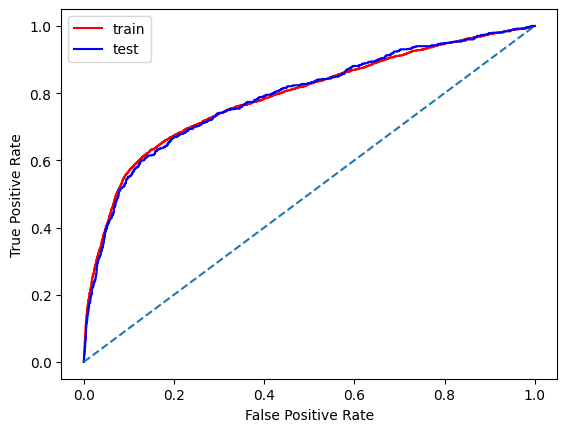

Train/Test split results:
LogisticRegression accuracy is 0.803
LogisticRegression auc in test is 0.789
LogisticRegression auc in train is 0.790
LogisticRegression Sensitivity is 0.637
LogisticRegression Specificity is 0.825
LogisticRegression F1 is 0.431


In [189]:
compute_metrics(model_rl_3, X_train_enc, y_train, X_test_enc, y_test)

In [98]:
# LR Hyperparameter tuning 1 - GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best ROC AUC on validation: 0.779963992702008


In [ ]:
# Initialize the best model with the best hyperparameters
best_rl_model = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced', **best_params)

# Train the model
best_rl_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rl_model, X_train, y_train, X_test, y_test)

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=1234, solver='liblinear')

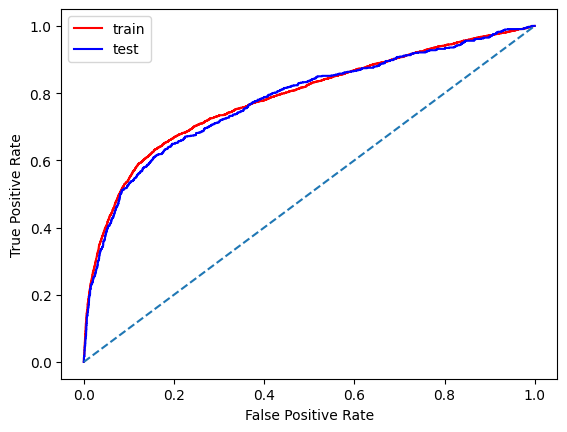

Train/Test split results:
LogisticRegression accuracy is 0.770
LogisticRegression auc in test is 0.780
LogisticRegression auc in train is 0.786
LogisticRegression Sensitivity is 0.660
LogisticRegression Specificity is 0.784
LogisticRegression F1 is 0.402


In [ ]:
# Compute metrics of the best model
compute_metrics(best_rl_model, X_train, y_train, X_test, y_test)

In [71]:
# Change the model name
model_rl_4 = best_rl_model

In [ ]:
# LR Hyperparameter tuning 2 - GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1],
    'penalty': ['l1', None],
    'solver': ['liblinear', 'newton-cg'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=100, 
    random_state=1234,
    class_weight='balanced', 
    warm_start=True),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuari

Best parameters: {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
Best ROC AUC on validation: 0.783426983608442


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


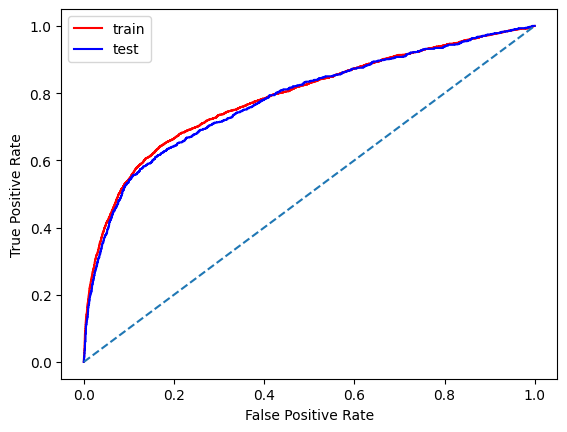

Train/Test split results:
LogisticRegression accuracy is 0.760
LogisticRegression auc in test is 0.781
LogisticRegression auc in train is 0.788
LogisticRegression Sensitivity is 0.664
LogisticRegression Specificity is 0.773
LogisticRegression F1 is 0.393


In [91]:
# Initialize the best model with the best hyperparameters
best_rl_model = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced', **best_params)

# Train the model
best_rl_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rl_model, X_train, y_train, X_test, y_test)

In [92]:
# Change the model name
model_rl_5 = best_rl_model

In [ ]:
# LR Hyperparameter tuning 3 - GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 1],
    'penalty': ['l2', None, 'l1', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'lbfgs'],
    
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=100, 
    random_state=1234,
    class_weight='balanced', 
    warm_start=True),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Best ROC AUC on validation: 0.7836951678184775


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usua

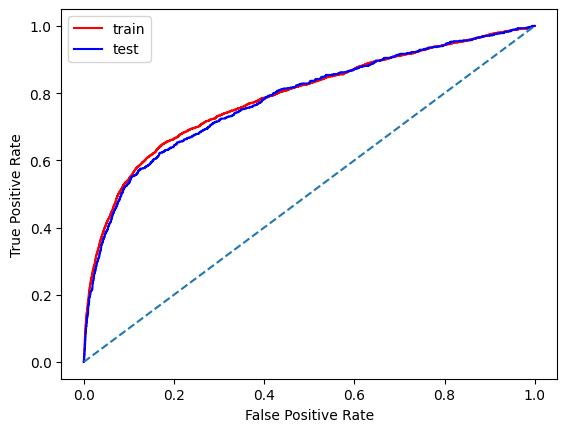

Train/Test split results:
LogisticRegression accuracy is 0.768
LogisticRegression auc in test is 0.782
LogisticRegression auc in train is 0.788
LogisticRegression Sensitivity is 0.656
LogisticRegression Specificity is 0.783
LogisticRegression F1 is 0.398


In [99]:
# Initialize the best model with the best hyperparameters
best_rl_model = LogisticRegression(max_iter=1000, random_state=1234, class_weight='balanced', **best_params)

# Train the model
best_rl_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rl_model, X_train, y_train, X_test, y_test)

In [100]:
# Change the model name
model_rl_6 = best_rl_model

In [58]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# X: Variables predictoras preprocesadas
# y: Variable objetivo binaria (0 y 1)
# Asegúrate de que X e y estén listos y preprocesados

# Definir la función objetivo
def logistic_cv(C, penalty_idx, solver_idx):
    """
    Función objetivo para maximizar el AUC-ROC mediante validación cruzada.
    """
    # Mapear valores categóricos para 'penalty' y 'solver'
    penalty = ['l2','none'][int(penalty_idx)]
    solver = ['liblinear', 'newton-cg', 'newton-cholesky', 'saga', 'lbfgs'][int(solver_idx)]
    
    # Crear el modelo
    model = LogisticRegression(
        C=C,                             # Inverso de la regularización
        penalty=penalty,                 # Tipo de regularización
        solver=solver,                   # Algoritmo para optimización
        max_iter=100,                    # Aumentar iteraciones
        random_state=1234, # Reproducibilidad
        n_jobs=-1
        
    )
    
    # Validación cruzada con AUC-ROC
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    return scores.mean()  # Retornar el promedio del AUC-ROC

# Definir el espacio de búsqueda para los hiperparámetros
pbounds = {
    'C': (0.01, 20),                  # Regularización: menor C = mayor regularización
    'penalty_idx': (0, 1),            # Índices de 'penalty' (0 = l1, 1 = l2, 2 = elasticnet)
    'solver_idx': (0, 4)              # Índices de 'solver' (0 = liblinear, 1 = newton-cg, ...)
}

# Crear el optimizador bayesiano
optimizer = BayesianOptimization(
    f=logistic_cv,                    # Función objetivo (AUC-ROC)
    pbounds=pbounds,                  # Espacio de búsqueda
    random_state=42,                  # Reproducibilidad
    verbose=2                         # Nivel de detalle
)

# Optimizar
optimizer.maximize(
    init_points=5,                    # Número de iteraciones iniciales (puntos aleatorios)
    n_iter=25                         # Número de iteraciones de optimización
)

# Mejor resultado
print("Mejores parámetros encontrados:")
print(optimizer.max)

# Guardar los mejores parámetros
best_params = optimizer.max['params']


|   iter    |  target   |     C     | penalt... | solver... |
-------------------------------------------------------------


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.7874    | 7.497     | 0.9507    | 2.928     |
| 2         | 0.7756    | 11.98     | 0.156     | 0.624     |
| 3         | 0.7874    | 1.171     | 0.8662    | 2.404     |
| 4         | 0.7257    | 14.16     | 0.02058   | 3.88      |
| 5         | 0.7756    | 16.65     | 0.2123    | 0.7273    |
| 6         | 0.7874    | 7.54      | 0.8806    | 2.915     |
| 7         | 0.7773    | 4.784     | 0.05771   | 0.3092    |
| 8         | 0.7257    | 4.127     | 0.05534   | 3.947     |
| 9         | 0.7776    | 7.541     | 0.9119    | 0.7634    |
| 10        | 0.7784    | 0.2619    | 0.9728    | 0.4915    |
| 11        | 0.7257    | 9.328     | 0.9835    | 3.965     |
| 12        | 0.7874    | 6.598     | 0.2143    | 2.144     |
| 13        | 0.7257    | 0.04943   | 0.8747    | 3.891     |
| 14        | 0.7868    | 1.946     | 0.7598    | 1.205     |
| 15        | 0.7867    | 0.7736    | 0.005275  | 1.41      |
| 16        | 0.7756    | 19.31     | 0.7664    | 0.08138   |
| 17    

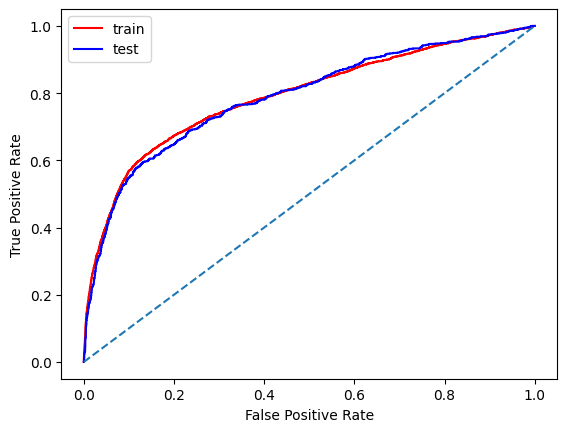

Train/Test split results:
LogisticRegression accuracy is 0.892
LogisticRegression auc in test is 0.788
LogisticRegression auc in train is 0.791
LogisticRegression Sensitivity is 0.226
LogisticRegression Specificity is 0.980
LogisticRegression F1 is 0.328


In [60]:
# Inicializar el modelo con los mejores hiperparámetros
best_rl_model_bayesian = LogisticRegression(
    C=best_params['C'],                # Inverso de la regularización
    penalty=['l2', 'none'][int(best_params['penalty_idx'])],  # Tipo de regularización
    solver=['liblinear', 'newton-cg', 'newton-cholesky', 'saga', 'lbfgs'][int(best_params['solver_idx'])],  # Algoritmo para optimización
    max_iter=100,                      # Aumentar iteraciones
    random_state=1234,                 # Reproducibilidad
    n_jobs=-1
)

# Entrenar el modelo
best_rl_model_bayesian.fit(X_train

# Calcular métricas del mejor modelo
compute_metrics(best_rl_model_bayesian, X_train, y_train, X_test, y_test)


### 3.1.- Training a KNN Model

Let´s start with a KNN model

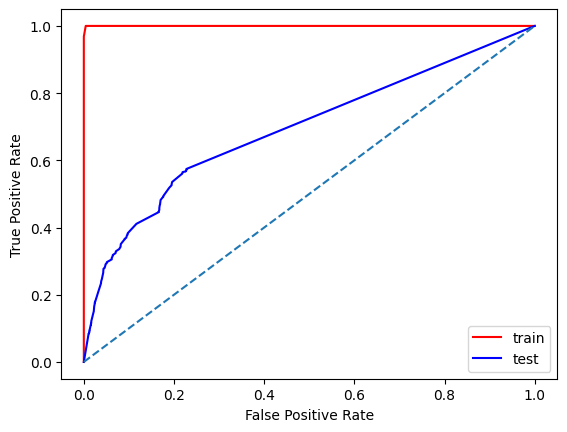

Train/Test split results:
KNeighborsClassifier accuracy is 0.864
KNeighborsClassifier auc in test is 0.693
KNeighborsClassifier auc in train is 1.000
KNeighborsClassifier Sensitivity is 0.305
KNeighborsClassifier Specificity is 0.938
KNeighborsClassifier F1 is 0.344


In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Define model
knn_model1 = KNeighborsClassifier(n_neighbors=3,
                                metric= 'hamming',
                                weights = 'distance') # 'uniform')

# Train model

knn_model1.fit(X_train, y_train)


# Compute metrics
compute_metrics(knn_model1, X_train, y_train, X_test, y_test, trh = 0.5)




- KNN model is overfitting on train data

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


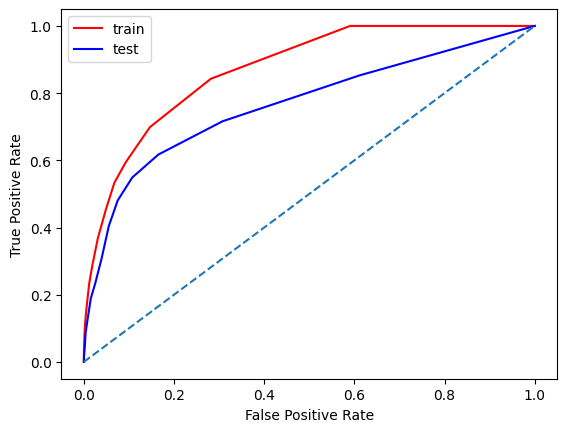

Train/Test split results:
GridSearchCV accuracy is 0.888
GridSearchCV auc in test is 0.766
GridSearchCV auc in train is 0.871
GridSearchCV Sensitivity is 0.234
GridSearchCV Specificity is 0.975
GridSearchCV F1 is 0.329


In [87]:
# KNN Hyperparameter tuning 1 - GridSearchCV

# Define hyperparameters
param_grid = {
    'n_neighbors': [5,10,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)   

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Compute metrics of the best model
compute_metrics(grid_search, X_trainst_transformed_df, y_test)

# Save the best parameters
best_params = grid_search.best_params_

KNN model improoved a lot, it is not overfitting now.

Let´s graph Error rate vs K value

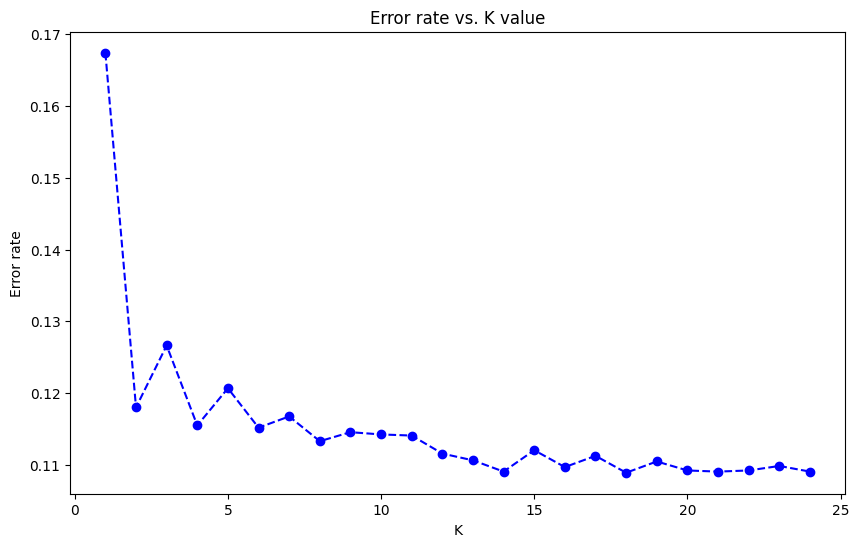

' for i in range(1, 10):\n    knn_model = KNeighborsClassifier(n_neighbors=i, metric=\'minkowski\', weights=\'distance\', n_jobs=-1)\n    knn_model.fit(X_train_transformed_df, y_train)\n    print(f"KNN Model with {i} neighbors")\n    compute_metrics(knn_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test, trh = 0.5)\n    '

In [90]:
# Create a for loop that trains various KNN models and graph error rate vs. K value

error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i,
                            metric= 'manhattan',
                            weights = 'uniform',
                            n_jobs=-1)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (10, 6))
plt.plot(range(1,25), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.title('Error rate vs. K value')
plt.show()



''' for i in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', weights='distance', n_jobs=-1)
    knn_model.fit(X_train, y_train)
    print(f"KNN Model with {i} neighbors")
    compute_metrics(knn_model, X_train, y_train, X_test, y_test, trh = 0.5)
    '''


Let´s graph AUC vs K value

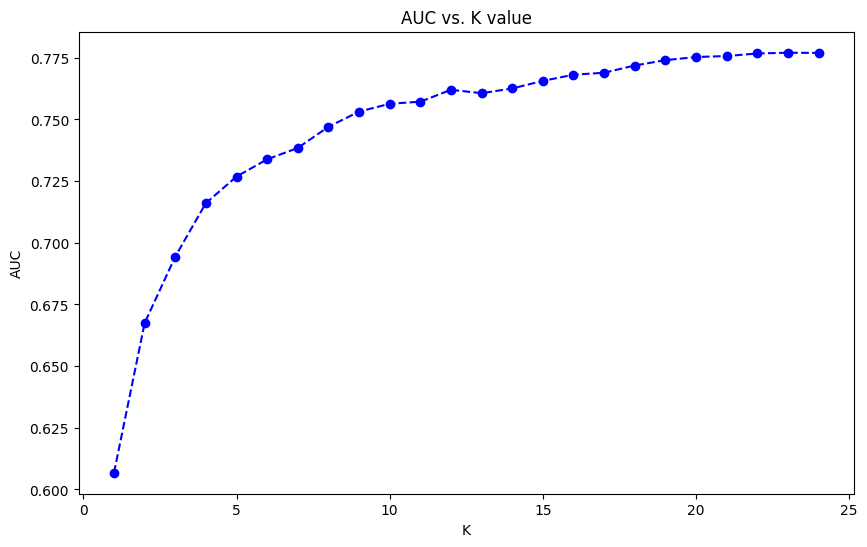

In [92]:
# Create a for loop that trains various KNN models and graph AUC vs. K value

auc = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i,
                            metric= 'manhattan',
                            weights = 'uniform',
                            n_jobs=-1)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    auc.append(metrics.roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))
    

plt.figure(figsize = (10, 6))
plt.plot(range(1,25), auc, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('AUC')
plt.title('AUC vs. K value')
plt.show()

Let´s model a KNN model with parameters selected based on the above graphs

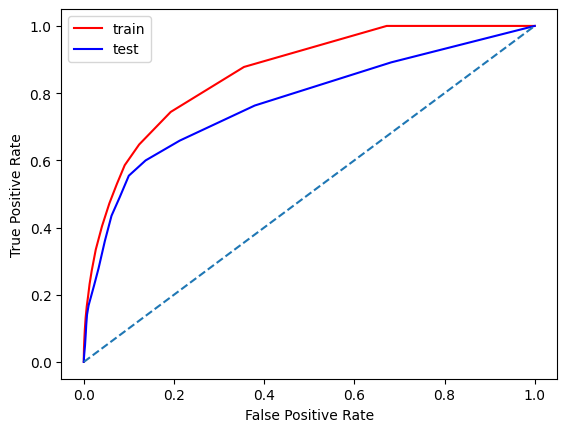

Train/Test split results:
KNeighborsClassifier accuracy is 0.870
KNeighborsClassifier auc in test is 0.774
KNeighborsClassifier auc in train is 0.862
KNeighborsClassifier Sensitivity is 0.490
KNeighborsClassifier Specificity is 0.920
KNeighborsClassifier F1 is 0.469


In [ ]:
# Define model
knn_model2 = KNeighborsClassifier(n_neighbors=19,
                                metric= 'manhattan',
                                weights = 'uniform',
                                n_jobs=-1)

# Train model

knn_model2.fit(X_train, y_train)


# Compute metrics
compute_metrics(knn_model2, X_train, y_train, X_test, y_test, trh = 0.5)

### 3.3.- Training a Decision Tree Model

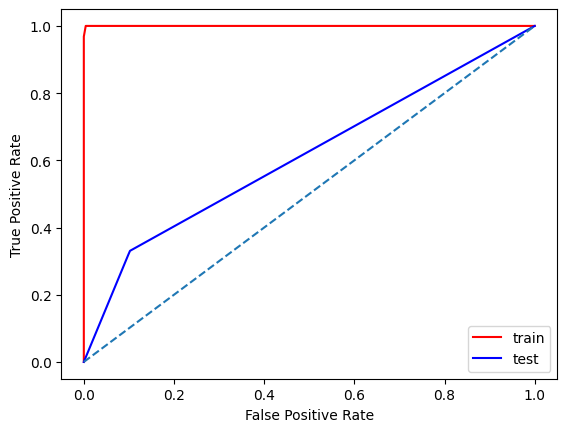

Train/Test split results:
DecisionTreeClassifier accuracy is 0.831
DecisionTreeClassifier auc in test is 0.614
DecisionTreeClassifier auc in train is 1.000
DecisionTreeClassifier Sensitivity is 0.331
DecisionTreeClassifier Specificity is 0.898
DecisionTreeClassifier F1 is 0.314


In [43]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=1234, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train, y_train)

# Compute metrics
compute_metrics(model_dt_1, X_train, y_train, X_test 0.5)




- This Decision Tree is overfitting on training data

In [27]:
model_dt_1.get_depth()

40

DT Hyperparameter tuning 1 - GridSearchCV

In [ ]:
# GridSearchCV for Decision Tree

# Define hyperparameters
param_grid = {
    'max_depth': [3,4,5,6],
    'min_samples_split': [2, 4, 6,10,15],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'random_state': [1234],
    'class_weight': ['balanced']
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 1234, 'splitter': 'random'}
Best ROC AUC on validation: 0.7883581228534642


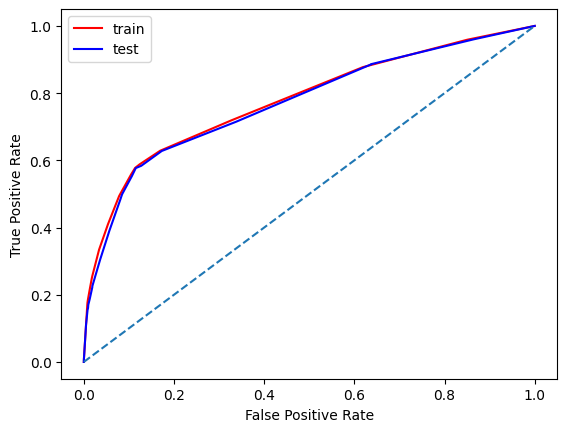

Train/Test split results:
DecisionTreeClassifier accuracy is 0.839
DecisionTreeClassifier auc in test is 0.771
DecisionTreeClassifier auc in train is 0.777
DecisionTreeClassifier Sensitivity is 0.584
DecisionTreeClassifier Specificity is 0.873
DecisionTreeClassifier F1 is 0.459


In [ ]:
# Initialize the best model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model
best_dt_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_dt_model, X_train, y_train, X_test


### 3.4.- Training a Random Forest Model

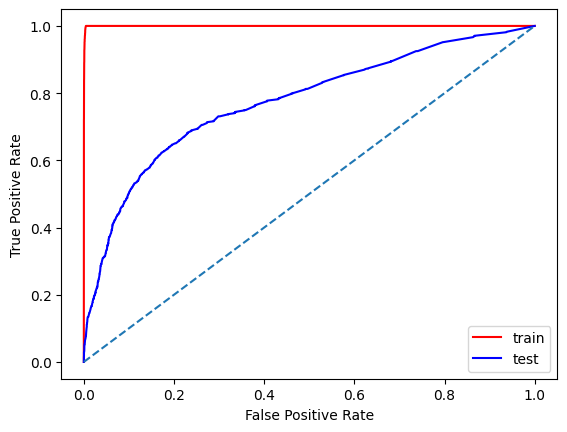

Train/Test split results:
RandomForestClassifier accuracy is 0.882
RandomForestClassifier auc in test is 0.774
RandomForestClassifier auc in train is 1.000
RandomForestClassifier Sensitivity is 0.254
RandomForestClassifier Specificity is 0.966
RandomForestClassifier F1 is 0.336


In [119]:
# Define Random Forest model
model_rf_1 = RandomForestClassifier(random_state=1234, class_weight='balanced', max_features=0.2, n_estimators=200, bootstrap=True)

# Train the model
model_rf_1.fit(X_train, y_train)

# Compute metrics
compute_metrics(model_rf_1, X_train, y_train, X_test, y_test, trh = 0.5)

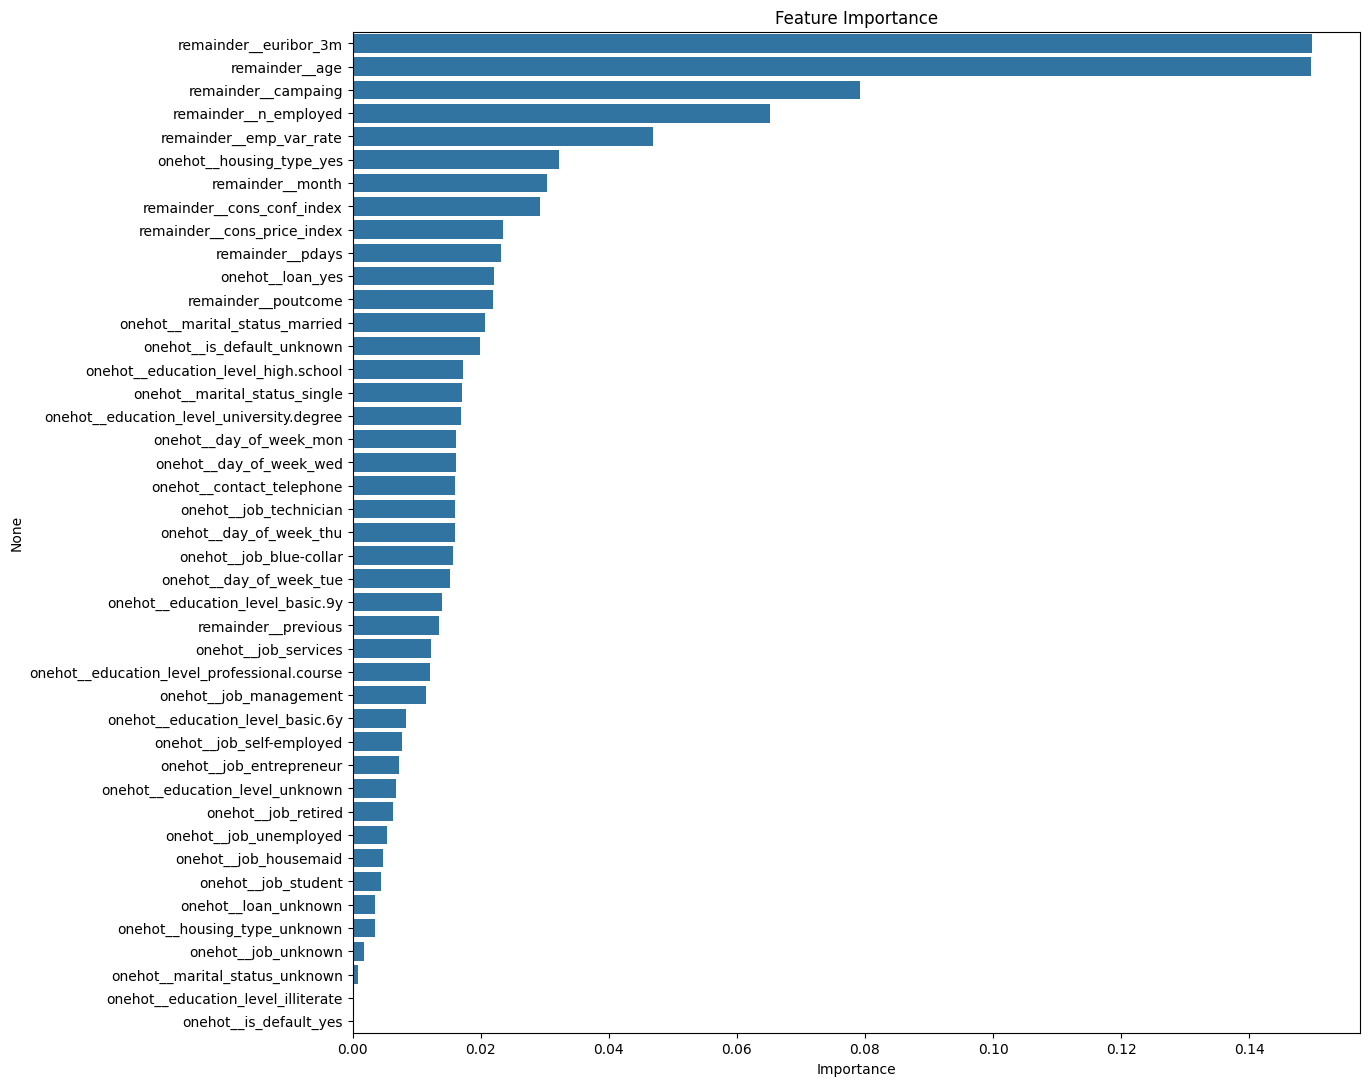

In [122]:
# Plot the feature importance

importances = model_rf_1.feature_importances_
columns = X_test.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.title('Feature Importance')
plt.show()



In [125]:
# Get a list of the 14 most important features
important_features = importance_df.index[:14]
important_features

Index(['remainder__euribor_3m', 'remainder__age', 'remainder__campaing',
       'remainder__n_employed', 'remainder__emp_var_rate',
       'onehot__housing_type_yes', 'remainder__month',
       'remainder__cons_conf_index', 'remainder__cons_price_index',
       'remainder__pdays', 'onehot__loan_yes', 'remainder__poutcome',
       'onehot__marital_status_married', 'onehot__is_default_unknown'],
      dtype='object')

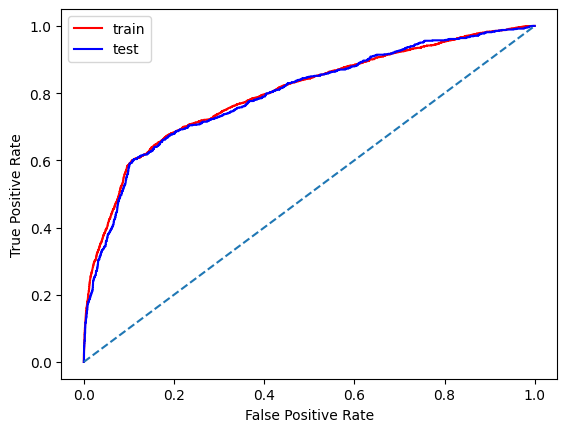

Train/Test split results:
RandomForestClassifier accuracy is 0.828
RandomForestClassifier auc in test is 0.795
RandomForestClassifier auc in train is 0.800
RandomForestClassifier Sensitivity is 0.624
RandomForestClassifier Specificity is 0.855
RandomForestClassifier F1 is 0.460


In [128]:
# Define Random Forest model
model_rf_1 = RandomForestClassifier(random_state=1234, class_weight='balanced',max_depth=5, max_features=0.2, n_estimators=200, bootstrap=True)

# Train the model
model_rf_1.fit(X_train[important_features], y_train)

# Compute metrics
compute_metrics(model_rf_1, X_train[important_features], y_train, X_test[important_features], y_test, trh = 0.5)

- Let´s select only the 14 most important features for modeling

- This model is overfitting on trainig data

In [126]:
# GridSearchCV for Random Forest -1

# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [1234],
    'class_weight': ['balanced'],
    'n_jobs': [-1]    
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train[important_features], y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_



Fitting 5 folds for each of 972 candidates, totalling 4860 fits


KeyboardInterrupt: 

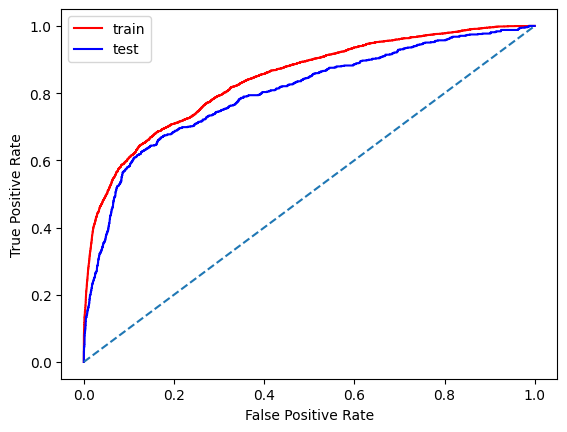

Train/Test split results:
RandomForestClassifier accuracy is 0.843
RandomForestClassifier auc in test is 0.802
RandomForestClassifier auc in train is 0.841
RandomForestClassifier Sensitivity is 0.625
RandomForestClassifier Specificity is 0.871
RandomForestClassifier F1 is 0.482


In [68]:
# Initialize the best model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Train the model
best_rf_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rf_model, X_train, y_train, X_test, y_test)

In [ ]:
Train/Test split results:
RandomForestClassifier accuracy is 0.843
RandomForestClassifier auc in test is 0.802
RandomForestClassifier auc in train is 0.841
RandomForestClassifier Sensitivity is 0.625
RandomForestClassifier Specificity is 0.871
RandomForestClassifier F1 is 0.482

In [74]:
# GridSearchCV for Random Forest - 2

# Define hyperparameters
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [8, 9,10],
    'min_samples_split': [8,12,14],
    'min_samples_leaf': [ 2,4,6],
    'criterion': ['entropy'],
    'max_features': ['sqrt'],
    'random_state': [1234],
    'class_weight': ['balanced'],
    'n_jobs': [-1]    
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\usuario\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 1234}
Best ROC AUC on validation: 0.8006219151956001


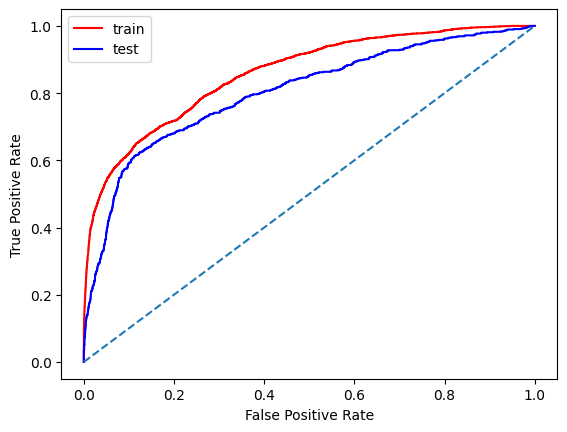

Train/Test split results:
RandomForestClassifier accuracy is 0.849
RandomForestClassifier auc in test is 0.803
RandomForestClassifier auc in train is 0.858
RandomForestClassifier Sensitivity is 0.616
RandomForestClassifier Specificity is 0.880
RandomForestClassifier F1 is 0.489


In [76]:
# Initialize the best model with the best hyperparameters
best_rf_model2 = RandomForestClassifier(**best_params)

# Train the model
best_rf_model2.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rf_model2, X_train, y_train, X_test, y_test)

- Let use bayesian optimization method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# Cargar o definir tus datos
# X: Variables predictoras, y: Variable objetivo
# Asegúrate de que `y` esté en formato binario para ROC
# X, y = ...

# Definir la función objetivo
def rf_cv_auc(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    """
    Función objetivo para maximizar el AUC-ROC mediante validación cruzada.
    """
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),                # Convertir a entero
        max_depth=int(max_depth),                      # Convertir a entero
        min_samples_split=int(min_samples_split),      # Convertir a entero
        min_samples_leaf=int(min_samples_leaf),        # Convertir a entero
        random_state=42
    )
    # Validación cruzada con AUC-ROC como métrica
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')  # Cambiar a roc_auc
    return scores.mean()  # Retornar el promedio del AUC-ROC

# Definir el espacio de búsqueda para los hiperparámetros
pbounds = {
    'n_estimators': (10, 200),          # Número de árboles
    'max_depth': (3, 50),              # Profundidad máxima
    'min_samples_split': (2, 20),      # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': (1, 20)        # Mínimo número de muestras en una hoja
}

# Crear el optimizador bayesiano
optimizer = BayesianOptimization(
    f=rf_cv_auc,                       # Función objetivo (AUC-ROC)
    pbounds=pbounds,                   # Espacio de búsqueda
    random_state=42,                   # Reproducibilidad
    verbose=2                          # Nivel de detalle
)

# Optimizar
optimizer.maximize(
    init_points=5,                     # Número de iteraciones iniciales (puntos aleatorios)
    n_iter=25                          # Número de iteraciones de optimización
)

# Mejor resultado
print("Mejores parámetros encontrados:")
print(optimizer.max)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.7952    | 20.6      | 19.06     | 15.18     | 123.7     |
| 2         | 0.7966    | 10.33     | 3.964     | 3.046     | 174.6     |
| 3         | 0.7951    | 31.25     | 14.45     | 2.371     | 194.3     |
| 4         | 0.7905    | 42.12     | 5.034     | 5.273     | 44.85     |
| 5         | 0.7949    | 17.3      | 10.97     | 9.775     | 65.33     |
| 6         | 0.7907    | 18.88     | 2.48      | 5.451     | 183.1     |
| 7         | 0.7913    | 5.313     | 1.351     | 12.81     | 147.5     |
| 8         | 0.7876    | 3.21      | 1.767     | 10.4      | 76.9      |
| 9         | 0.7942    | 48.63     | 14.48     | 19.89     | 81.05     |
| 10        | 0.7893    | 25.16     | 4.049     | 16.44     | 28.34     |
| 11        | 0.795     | 47.1      | 14.42     | 10.1      | 199.7     |
| 12        | 0.7948    | 21.84     | 18.38     | 13.0      | 124.4     |
| 13        | 0.7903    | 4.327     | 3.146     | 3.788     | 170.1     |
| 14        | 0.7971    | 12.46     | 

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# Cargar o definir tus datos
# X: Variables predictoras, y: Variable objetivo
# Asegúrate de que `y` esté en formato binario para ROC
# X, y = ...

# Definir la función objetivo
def rf_cv_auc(n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion_idx, max_features):
    """
    Función objetivo para maximizar el AUC-ROC mediante validación cruzada.
    """
    # Mapear valores numéricos a opciones categóricas
    criterion = ['gini', 'entropy', 'log_loss'][int(criterion_idx)]
    
    # Crear el modelo
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),                # Convertir a entero
        max_depth=int(max_depth),                      # Convertir a entero
        min_samples_split=int(min_samples_split),      # Convertir a entero
        min_samples_leaf=int(min_samples_leaf),        # Convertir a entero
        criterion=criterion,                           # Criterio mapeado
        max_features=max_features,                    # max_features como flotante
        random_state=1234,                             # Reproducibilidad
        class_weight='balanced',                       # Balanceo de clases
        n_jobs=-1                                      # Paralelizar ajuste
    )
    # Validación cruzada con AUC-ROC como métrica
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')  
    return scores.mean()  # Retornar el promedio del AUC-ROC

# Definir el espacio de búsqueda para los hiperparámetros
pbounds = {
    'n_estimators': (10, 200),          # Número de árboles
    'max_depth': (3, 20),              # Profundidad máxima
    'min_samples_split': (2, 20),      # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': (1, 20),       # Mínimo número de muestras en una hoja
    'criterion_idx': (0, 2),           # Índices de 'criterion' (0 = gini, 1 = entropy, 2 = log_loss)
    'max_features': (0.1, 0.9)         # max_features como proporción de características
}

# Crear el optimizador bayesiano
optimizer = BayesianOptimization(
    f=rf_cv_auc,                       # Función objetivo (AUC-ROC)
    pbounds=pbounds,                   # Espacio de búsqueda
    random_state=1234,                   # Reproducibilidad
    verbose=2                          # Nivel de detalle
)

# Optimizar
optimizer.maximize(
    init_points=5,                     # Número de iteraciones iniciales (puntos aleatorios)
    n_iter=30                          # Número de iteraciones de optimización
)

# Mejor resultado
print("Mejores parámetros encontrados:")
print(optimizer.max)

# guardar mejores parámetros
best_params = optimizer.max['params']


|   iter    |  target   | criter... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.8004    | 0.383     | 13.58     | 0.4502    | 15.92     | 16.04     | 61.79     |
| 2         | 0.7977    | 0.5529    | 16.63     | 0.8665    | 17.64     | 8.441     | 105.2     |
| 3         | 0.7944    | 1.367     | 15.12     | 0.3962    | 11.66     | 11.06     | 12.62     |
| 4         | 0.7982    | 1.546     | 18.0      | 0.3919    | 12.69     | 3.357     | 80.08     |
| 5         | 0.7999    | 1.866     | 14.07     | 0.4178    | 15.99     | 7.703     | 117.9     |
| 6         | 0.7935    | 0.5645    | 16.46     | 0.5914    | 7.304     | 2.961     | 29.63     |
| 7         | 0.8033    | 1.928     | 11.19     | 0.2213    | 13.06     | 9.752     | 140.2     |
| 8         | 0.7932    | 1.392     | 4.359     | 0.3563    | 19.84     | 3.387     | 166.8     |
| 9         | 0.7976    | 0.4991    | 14.16     | 0.875     | 14.48     | 16.83     | 61.83     |
| 10        | 0.7992    | 1.97      | 13.4      | 0.6845    | 11.47     | 9.28      | 142.1     |
| 11        | 0.802 

In [ ]:
# Initialize the best model with the best hyperparameters
best_rf_model3 = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    criterion=['gini', 'entropy', 'log_loss'][int(best_params['criterion_idx'])],
    max_features=best_params['max_features'],
    random_state=1234,
    class_weight='balanced',
    n_jobs=-1
)

# Train the model
best_rf_model3.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_rf_model3, X_train, y_train, X_test, y_test)

KeyError: 'min_samples_split'

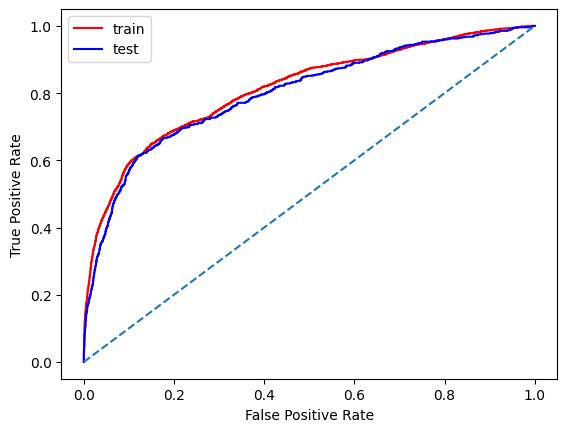

Train/Test split results:
RandomForestClassifier accuracy is 0.831
RandomForestClassifier auc in test is 0.800
RandomForestClassifier auc in train is 0.813
RandomForestClassifier Sensitivity is 0.628
RandomForestClassifier Specificity is 0.858
RandomForestClassifier F1 is 0.466


In [102]:
# Define Random Forest model
model_rf_3 = RandomForestClassifier(random_state=1234, class_weight='balanced', max_depth=6, max_features=0.2, n_estimators=200, bootstrap=True)

# Train the model
model_rf_3.fit(X_train, y_train)

# Compute metrics
compute_metrics(model_rf_3, X_train, y_train, X_test, y_test, trh = 0.5)

### 3.5.- Training a ADABOOST model

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


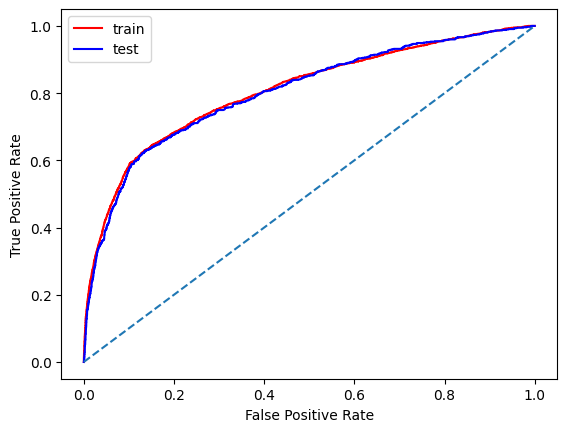

Train/Test split results:
AdaBoostClassifier accuracy is 0.894
AdaBoostClassifier auc in test is 0.802
AdaBoostClassifier auc in train is 0.806
AdaBoostClassifier Sensitivity is 0.228
AdaBoostClassifier Specificity is 0.983
AdaBoostClassifier F1 is 0.335


In [34]:
# Use AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# Define the model
model_ab_1 = AdaBoostClassifier(random_state=1234, n_estimators=200, learning_rate=0.6)

# Train the model
model_ab_1.fit(X_train, y_train)

# Compute metrics
compute_metrics(model_ab_1, X_train, y_train, X_test, y_test, trh = 0.5)

In [41]:
# Bayes Optimization for AdaBoost

from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# Definir la función objetivo
def ab_cv_auc(n_estimators, learning_rate):
    """
    Función objetivo para maximizar el AUC-ROC mediante validación cruzada.
    """
    model = AdaBoostClassifier(
        n_estimators=int(n_estimators),                # Convertir a entero
        learning_rate=learning_rate,                   # Tasa de aprendizaje
        random_state=1234
    )
    # Validación cruzada con AUC-ROC como métrica
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')  # Cambiar a roc_auc
    return scores.mean()  # Retornar el promedio del AUC-ROC

# Definir el espacio de búsqueda para los hiperparámetros
pbounds = {
    'n_estimators': (10, 300),          # Número de árboles
    'learning_rate': (0.01, 2)          # Tasa de aprendizaje
}

# Crear el optimizador bayesiano
optimizer = BayesianOptimization(
    f=ab_cv_auc,                       # Función objetivo (AUC-ROC)
    pbounds=pbounds,                   # Espacio de búsqueda
    random_state=1234,                 # Reproducibilidad
    verbose=2                          # Nivel de detalle
)

# Optimizar
optimizer.maximize(
    init_points=5,                     # Número de iteraciones iniciales (puntos aleatorios)
    n_iter=50                          # Número de iteraciones de optimización
)

# Mejor resultado
print("Mejores parámetros encontrados:")
print(optimizer.max)

# Guardar los mejores parámetros
best_params = optimizer.max['params']



|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.7939    | 0.3911    | 190.4     |
| 2         | 0.7957    | 0.8811    | 237.8     |
| 3         | 0.7921    | 1.562     | 89.05     |
| 4         | 0.7961    | 0.5602    | 242.5     |
| 5         | 0.7922    | 1.917     | 264.0     |
| 6         | 0.7863    | 0.02672   | 218.4     |
| 7         | 0.7949    | 0.5797    | 172.4     |
| 8         | 0.7915    | 1.858     | 156.4     |
| 9         | 0.7824    | 0.8111    | 10.03     |
| 10        | 0.7895    | 0.05176   | 300.0     |
| 11        | 0.7901    | 0.1915    | 118.5     |
| 12        | 0.7881    | 0.1577    | 61.77     |
| 13        | 0.7935    | 1.928     | 180.8     |
| 14        | 0.7876    | 0.03113   | 280.4     |
| 15        | 0.7775    | 1.989     | 251.7     |
| 16        | 0.7934    | 1.645     | 167.1     |
| 17        | 0.7923    | 1.896     | 231.8     |
| 18        | 0.794     | 1.695     | 197.4     |
| 19        | 0.7896    | 0.08331   | 204.2     |
| 20        | 0.7935    | 0.5961    | 98.79     |


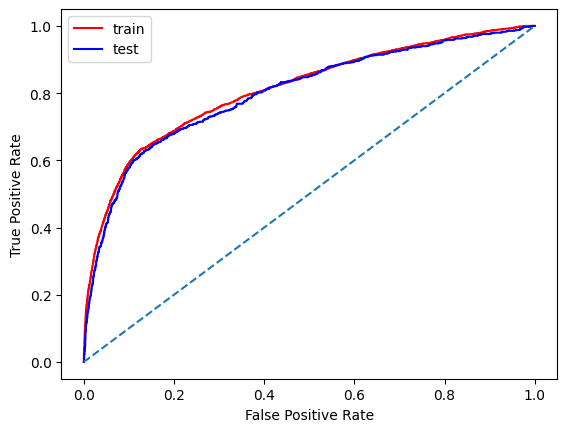

Train/Test split results:
AdaBoostClassifier accuracy is 0.894
AdaBoostClassifier auc in test is 0.801
AdaBoostClassifier auc in train is 0.811
AdaBoostClassifier Sensitivity is 0.228
AdaBoostClassifier Specificity is 0.982
AdaBoostClassifier F1 is 0.334


In [76]:
# Initialize the best model with the best hyperparameters
best_ab_model = AdaBoostClassifier(
    n_estimators=int(best_params['n_estimators']),
    learning_rate=best_params['learning_rate'],
    random_state=1234
)

# Train the model
best_ab_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_ab_model, X_train, y_train, X_test, y_test)



### 3.5.- Training a XGBOOST model

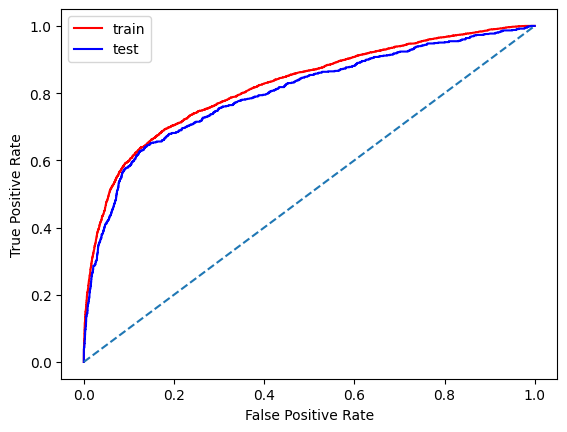

Train/Test split results:
XGBClassifier accuracy is 0.897
XGBClassifier auc in test is 0.801
XGBClassifier auc in train is 0.823
XGBClassifier Sensitivity is 0.264
XGBClassifier Specificity is 0.981
XGBClassifier F1 is 0.375


In [111]:
# XGBoost model

from xgboost import XGBClassifier

# Define the model
model_xgb_1 = XGBClassifier(random_state=1234, booster='gbtree', n_estimators=50, learning_rate=0.3, max_depth=3, subsample=0.9, colsample_bytree=0.8, gamma=0.1)

# Train the model
model_xgb_1.fit(X_train, y_train)

# Compute metrics
compute_metrics(model_xgb_1, X_train, y_train, X_test, y_test, trh = 0.5)

In [112]:
# GridSearchCV for XGBoost

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2],
    'random_state': [1234]
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(booster='gbtree'),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'random_state': 1234, 'subsample': 0.9}
Best ROC AUC on validation: 0.8040169418204636


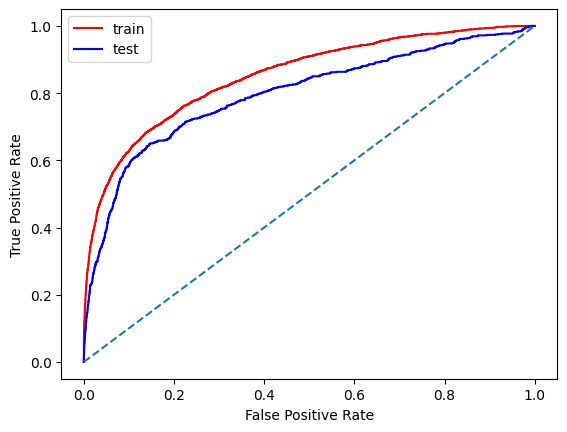

Train/Test split results:
XGBClassifier accuracy is 0.895
XGBClassifier auc in test is 0.797
XGBClassifier auc in train is 0.852
XGBClassifier Sensitivity is 0.269
XGBClassifier Specificity is 0.977
XGBClassifier F1 is 0.374


In [113]:
# Initialize the best model with the best hyperparameters

best_xgb_model = XGBClassifier(booster='gbtree', **best_params)

# Train the model
best_xgb_model.fit(X_train, y_train)

# Compute metrics of the best model
compute_metrics(best_xgb_model, X_train, y_train, X_test, y_test)



## Kaggle Submission

In [ ]:
## Kaggle Competition
#---> https://www.kaggle.com/t/316fa1a3165d42d0aed367fba46c7601



In [ ]:
# Descarga el dataset de test para hacer la predicción:
import pandas as pd

if Local == True:
    !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
    valid_df = pd.read_csv('test.csv')
else:
    valid_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

NameError: name 'Local' is not defined

In [209]:
valid_df = pd.read_csv('test.csv')

In [194]:
valid_df.head()

,id,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#### Feature Engineering a valid_df
Aplicar las transformaciones a valid_df (las mismas que realizaste para train_df)

In [210]:
valid_transformed = valid_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed']]

In [211]:
valid_df.head()

,id,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


- Validation data includes an ID feature, lests drop it.

In [212]:
valid_df.drop(columns = ['id'], inplace = True)

In [213]:
valid_df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [214]:
# Transforming valid dataset
valid_df_transf = trans_enc_val_data(valid_df)

In [216]:
# Checking the transformed validation data
valid_df_transf.head().T

,0,1,2,3,4
age,1.528401,1.528401,0.085918,-0.491074,1.432235
job,-0.179667,-0.385383,-0.535857,-0.535857,-0.535857
marital_status,0.105375,0.105375,0.105375,0.105375,0.105375
education_level,0.102088,0.112411,0.157847,0.086183,0.102088
is_default,0.133842,0.133842,0.054089,0.133842,0.054089
housing_type_yes,0.000000,0.000000,0.000000,1.000000,1.000000
housing_type_no,1.000000,1.000000,1.000000,0.000000,0.000000
housing_type_unknown,0.000000,0.000000,0.000000,0.000000,0.000000
loan_no,1.000000,0.000000,1.000000,1.000000,1.000000
loan_yes,0.000000,1.000000,0.000000,0.000000,0.000000


In [106]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict(X_valid)

    submission = pd.DataFrame({'id': Id_aux['id'],
                              'output': y_valid_pred})
    return (submission)

In [217]:
#################################
#Función auxiliar (NO MODIFICAR) MIA:
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict(X_valid)

    submission = pd.DataFrame({'id': Id_aux['id'],
                              'output': y_valid_pred})
    return (submission)

In [218]:
submission = eval_best_model(model_rl_3, valid_df_transf)

In [219]:
submission.to_csv('./submissions/submission_model_rl_3_feat_eng.csv', index = False)

In [220]:
submission.shape

(8080, 2)